In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [3]:
# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


In [4]:
def build_and_train_model(base_model, train_images, train_labels, test_images, test_labels):
    # Create the model
    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=256, validation_data=(test_images, test_labels))
    return history


In [5]:
# VGG16 Model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in vgg16_base.layers:
    layer.trainable = False
vgg16_history = build_and_train_model(vgg16_base, train_images, train_labels, test_images, test_labels)


2024-04-28 23:55:17.133260: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-04-28 23:55:17.133289: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-28 23:55:17.133297: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-28 23:55:17.133334: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-28 23:55:17.133352: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2024-04-28 23:55:18.396421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 1.6182 - accuracy: 0.4342

2024-04-28 23:55:29.293028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 13s 54ms/step - loss: 1.6182 - accuracy: 0.4342 - val_loss: 1.3156 - val_accuracy: 0.5436
Epoch 2/10
196/196 [==============================] - 10s 49ms/step - loss: 1.3451 - accuracy: 0.5311 - val_loss: 1.2715 - val_accuracy: 0.5557
Epoch 3/10
196/196 [==============================] - 10s 49ms/step - loss: 1.2857 - accuracy: 0.5519 - val_loss: 1.2410 - val_accuracy: 0.5682
Epoch 4/10
196/196 [==============================] - 10s 49ms/step - loss: 1.2578 - accuracy: 0.5620 - val_loss: 1.2205 - val_accuracy: 0.5736
Epoch 5/10
196/196 [==============================] - 10s 49ms/step - loss: 1.2462 - accuracy: 0.5660 - val_loss: 1.2212 - val_accuracy: 0.5724
Epoch 6/10
196/196 [==============================] - 10s 49ms/step - loss: 1.2389 - accuracy: 0.5708 - val_loss: 1.2110 - val_accuracy: 0.5744
Epoch 7/10
196/196 [==============================] - 10s 49ms/step - loss: 1.2299 - accuracy: 0.5737 - val_loss: 1.2128 - val_accuracy: 0.5771
Epo

In [8]:
# ResNet50 Model
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in resnet50_base.layers:
    layer.trainable = False
resnet50_history = build_and_train_model(resnet50_base, train_images, train_labels, test_images, test_labels)


Epoch 1/10


2024-04-28 23:57:36.534449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 3.4436 - accuracy: 0.1439

2024-04-28 23:57:54.337624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 23s 105ms/step - loss: 3.4436 - accuracy: 0.1439 - val_loss: 2.0972 - val_accuracy: 0.2428
Epoch 2/10
196/196 [==============================] - 19s 95ms/step - loss: 2.3195 - accuracy: 0.2167 - val_loss: 1.9810 - val_accuracy: 0.2672
Epoch 3/10
196/196 [==============================] - 19s 95ms/step - loss: 2.0918 - accuracy: 0.2518 - val_loss: 1.9232 - val_accuracy: 0.2916
Epoch 4/10
196/196 [==============================] - 19s 95ms/step - loss: 2.0058 - accuracy: 0.2741 - val_loss: 1.9273 - val_accuracy: 0.2903
Epoch 5/10
196/196 [==============================] - 19s 95ms/step - loss: 1.9598 - accuracy: 0.2887 - val_loss: 1.8538 - val_accuracy: 0.3342
Epoch 6/10
196/196 [==============================] - 19s 95ms/step - loss: 1.9339 - accuracy: 0.2983 - val_loss: 1.8267 - val_accuracy: 0.3420
Epoch 7/10
196/196 [==============================] - 19s 95ms/step - loss: 1.9121 - accuracy: 0.3056 - val_loss: 1.7962 - val_accuracy: 0.3574
Ep

In [9]:
# MobileNet Model
mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in mobilenet_base.layers:
    layer.trainable = False
mobilenet_history = build_and_train_model(mobilenet_base, train_images, train_labels, test_images, test_labels)

Epoch 1/10


2024-04-29 00:00:46.769774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 2.2085 - accuracy: 0.1846

2024-04-29 00:00:53.000215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 8s 35ms/step - loss: 2.2085 - accuracy: 0.1846 - val_loss: 2.1608 - val_accuracy: 0.2172
Epoch 2/10
196/196 [==============================] - 6s 30ms/step - loss: 2.1696 - accuracy: 0.2119 - val_loss: 2.1493 - val_accuracy: 0.2214
Epoch 3/10
196/196 [==============================] - 6s 29ms/step - loss: 2.1654 - accuracy: 0.2122 - val_loss: 2.1492 - val_accuracy: 0.2227
Epoch 4/10
196/196 [==============================] - 6s 30ms/step - loss: 2.1625 - accuracy: 0.2142 - val_loss: 2.1467 - val_accuracy: 0.2240
Epoch 5/10
196/196 [==============================] - 6s 30ms/step - loss: 2.1617 - accuracy: 0.2126 - val_loss: 2.1465 - val_accuracy: 0.2230
Epoch 6/10
196/196 [==============================] - 6s 30ms/step - loss: 2.1628 - accuracy: 0.2141 - val_loss: 2.1484 - val_accuracy: 0.2200
Epoch 7/10
196/196 [==============================] - 6s 30ms/step - loss: 2.1628 - accuracy: 0.2116 - val_loss: 2.1454 - val_accuracy: 0.2200
Epoch 8/10

In [13]:
def evaluate_model(model, test_images, test_labels):
    # Evaluate the model on the test set
    return model.evaluate(test_images, test_labels)[1]

# Evaluate each model after training
vgg16_accuracy = evaluate_model(vgg16_history.model, test_images, test_labels)
resnet50_accuracy = evaluate_model(resnet50_history.model, test_images, test_labels)
mobilenet_accuracy = evaluate_model(mobilenet_history.model, test_images, test_labels)

# Print out the accuracies
print(f'VGG16 Accuracy: {vgg16_accuracy:.4f}')
print(f'ResNet50 Accuracy: {resnet50_accuracy:.4f}')
print(f'MobileNet Accuracy: {mobilenet_accuracy:.4f}')


313/313 [==============================] - 4s 12ms/step - loss: 2.1458 - accuracy: 0.2204
VGG16 Accuracy: 0.5840
ResNet50 Accuracy: 0.3502
MobileNet Accuracy: 0.2204


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def get_metrics(model, test_images, test_labels):
    # Predict the labels for the test set
    predictions = model.predict(test_images)
    predictions = np.argmax(predictions, axis=1)
    true_labels = np.argmax(test_labels, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='macro')
    recall = recall_score(true_labels, predictions, average='macro')
    f1 = f1_score(true_labels, predictions, average='macro')
    
    return accuracy, precision, recall, f1

# Example of obtaining metrics for one model
vgg16_metrics = get_metrics(vgg16_history.model, test_images, test_labels)
resnet50_metrics = get_metrics(resnet50_history.model, test_images, test_labels)
mobilenet_metrics = get_metrics(mobilenet_history.model, test_images, test_labels)


 12/313 [>.............................] - ETA: 3s

2024-04-29 00:06:41.797219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 16ms/step


2024-04-29 00:06:47.209896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 6s 18ms/step


2024-04-29 00:06:53.564280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 9ms/step


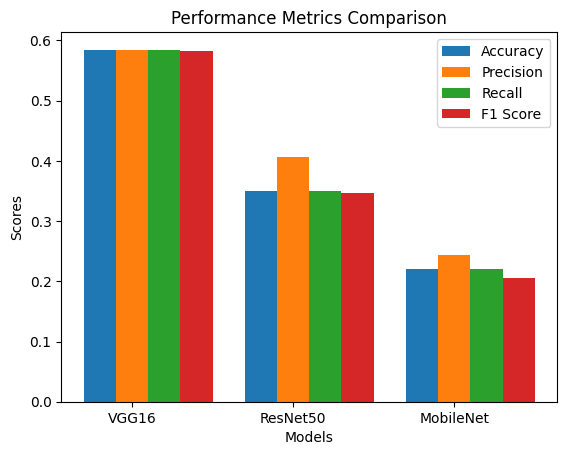

In [16]:
import matplotlib.pyplot as plt

# Metrics for each model
metrics = {
    'VGG16': vgg16_metrics,
    'ResNet50': resnet50_metrics,
    'MobileNet': mobilenet_metrics
}

# Metric names
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Setting up the bar plot
fig, ax = plt.subplots()
n_groups = len(metrics)
index = np.arange(n_groups)
bar_width = 0.2

# Plotting each metric
for i, metric_name in enumerate(metric_names):
    ax.bar(index + i * bar_width, [metrics[model][i] for model in metrics], bar_width, label=metric_name)

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics.keys())
ax.legend()

# Showing the plot
plt.show()
